In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

import pathlib as pl
import sys

from cdt.causality.graph import SAM

Detecting 1 CUDA device(s).


In [2]:
sys.path.append(str(pl.Path.cwd().parent))

In [3]:
from datagen import DataGenerator

In [4]:
TRAIN_EPOCH = 500
TEST_EPOCH = 200
NRUNS = 6

### 2 nodes, gaussian data, linear dependence

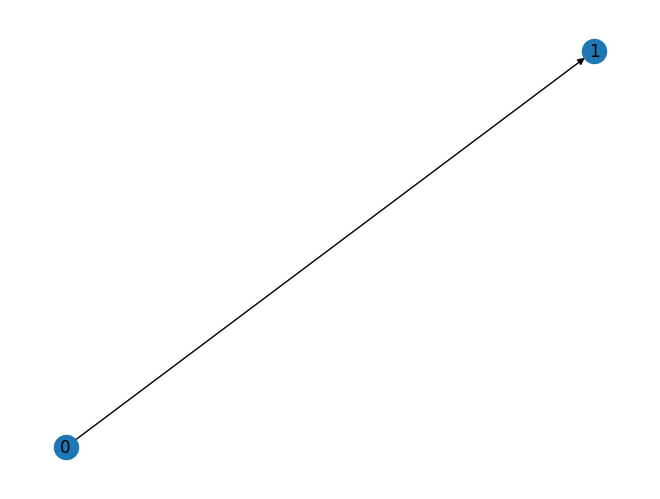

In [5]:
simple_graph = nx.DiGraph()
simple_graph.add_nodes_from(range(2))
simple_graph.add_edge(0, 1, weight=0.5)
nx.draw(simple_graph, with_labels=True)

In [6]:
data = DataGenerator(simple_graph, 2).generate(10000)
df = pd.DataFrame(data, columns=["X", "Y"])

In [7]:
sam = SAM(verbose=True, njobs=2, train_epochs=TRAIN_EPOCH, test_epochs=TEST_EPOCH, nruns=NRUNS)
res = sam.predict(df)
nx.get_edge_attributes(res, "weight")

100%|█| 700/700 [01:33<00:00,  7.51it/s, disc=-2.39, gen=-.975, regul_loss=0.001, tot=-1.8
100%|█| 700/700 [01:33<00:00,  7.49it/s, disc=-.802, gen=-.998, regul_loss=0.00101, tot=-1
100%|█| 700/700 [01:34<00:00,  7.42it/s, disc=-2.66, gen=-.913, regul_loss=0.00101, tot=-1
100%|█| 700/700 [01:34<00:00,  7.41it/s, disc=1.13, gen=-.726, regul_loss=0.001, tot=-.195
100%|█| 700/700 [01:33<00:00,  7.45it/s, disc=-1.75, gen=-1.19, regul_loss=0.001, tot=-2.1
100%|█| 700/700 [01:33<00:00,  7.45it/s, disc=-.273, gen=-1.09, regul_loss=0.002, tot=-2.1


{('X', 'Y'): 0.44340547919273376, ('Y', 'X'): 0.5687798261642456}

### 2 nodes, gaussian data, non linear dependence

In [8]:
generator = DataGenerator(simple_graph, 2)
generator.set_child_func(1, lambda data, preds: data[0]**2 + np.random.normal()*0.08)
data = generator.generate(10000)
df = pd.DataFrame(data, columns=["X", "Y"])

In [9]:
sam = SAM(verbose=True, njobs=2, train_epochs=TRAIN_EPOCH, test_epochs=TEST_EPOCH, nruns=NRUNS)
res = sam.predict(df)
nx.get_edge_attributes(res, "weight")

100%|█| 700/700 [01:33<00:00,  7.50it/s, disc=-.0392, gen=-1.04, regul_loss=5.24e-6, tot=-
100%|█| 700/700 [01:33<00:00,  7.49it/s, disc=-.0231, gen=-.934, regul_loss=0.001, tot=-1.
100%|█| 700/700 [01:33<00:00,  7.49it/s, disc=-.0099, gen=-1.01, regul_loss=4.61e-6, tot=-
100%|█| 700/700 [01:33<00:00,  7.47it/s, disc=-.0497, gen=-1.03, regul_loss=4.85e-6, tot=-
100%|█| 700/700 [01:34<00:00,  7.43it/s, disc=-.244, gen=-.961, regul_loss=0.001, tot=-1.9
100%|█| 700/700 [01:34<00:00,  7.42it/s, disc=-.258, gen=-.934, regul_loss=0.001, tot=-1.8


{('X', 'Y'): 0.20144224166870117, ('Y', 'X'): 0.22550757229328156}

### 3 nodes, V shape, gaussian data, non linear dependence, same distribution

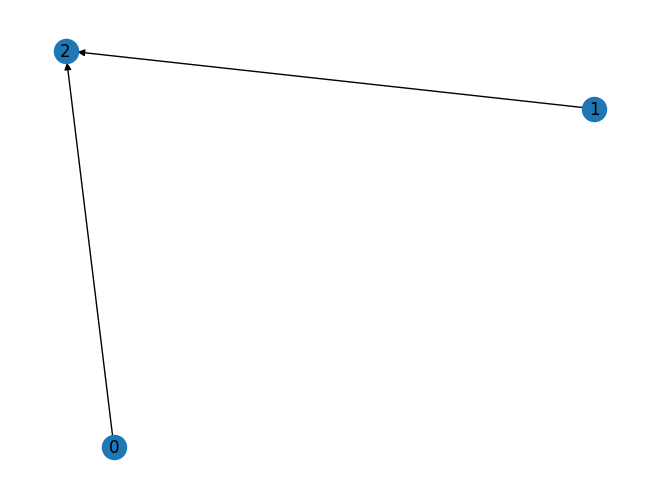

In [10]:
three_node_graph = nx.DiGraph()
three_node_graph.add_nodes_from(range(3))
three_node_graph.add_edge(0, 2, weight=0.6)
three_node_graph.add_edge(1, 2, weight=0.4)
nx.draw(three_node_graph, with_labels=True)

In [11]:
generator = DataGenerator(three_node_graph, 3)
generator.set_child_func(2, lambda data, preds: (data[0]**2) * 0.6 + data[1] * 0.4 + np.random.normal()*0.08)
data = generator.generate(10000)
df = pd.DataFrame(data, columns=["X", "Y", "Z"])

In [12]:
sam = SAM(verbose=True, njobs=2, train_epochs=TRAIN_EPOCH, test_epochs=TEST_EPOCH, nruns=NRUNS)
res = sam.predict(df)
nx.get_edge_attributes(res, "weight")

100%|█| 700/700 [02:06<00:00,  5.54it/s, disc=-.241, gen=-1.03, regul_loss=0.00201, tot=-3
100%|█| 700/700 [02:06<00:00,  5.53it/s, disc=-.386, gen=-.972, regul_loss=0.00101, tot=-2
100%|█| 700/700 [02:07<00:00,  5.50it/s, disc=-.361, gen=-1.08, regul_loss=0.00101, tot=-3
100%|█| 700/700 [02:07<00:00,  5.50it/s, disc=-.372, gen=-.965, regul_loss=0.00101, tot=-2
100%|█| 700/700 [02:06<00:00,  5.52it/s, disc=-.353, gen=-1.05, regul_loss=0.00101, tot=-3
100%|█| 700/700 [02:06<00:00,  5.52it/s, disc=-.334, gen=-.986, regul_loss=0.00101, tot=-2


{('X', 'Y'): 0.03687794879078865,
 ('X', 'Z'): 0.09225934743881226,
 ('Y', 'X'): 0.9654741883277893,
 ('Y', 'Z'): 0.14475099742412567,
 ('Z', 'X'): 0.10652881860733032,
 ('Z', 'Y'): 0.07679428905248642}

### 3 nodes, V shape, gaussian data, non linear dependence, different distribution

In [13]:
generator = DataGenerator(three_node_graph, 3)
generator.set_child_func(2, lambda data, preds: (data[0]**2) * 0.6 + data[1] * 0.4 + np.random.normal()*0.08)
generator.set_sample_func(0, lambda: np.random.normal(0, 2))
generator.set_sample_func(1, lambda: np.random.normal(-10, 5))
data = generator.generate(10000)
df = pd.DataFrame(data, columns=["X", "Y", "Z"])

In [14]:
sam = SAM(verbose=True, njobs=2, train_epochs=TRAIN_EPOCH, test_epochs=TEST_EPOCH, nruns=NRUNS)
res = sam.predict(df)
nx.get_edge_attributes(res, "weight")

100%|█| 700/700 [02:07<00:00,  5.51it/s, disc=-.704, gen=-.832, regul_loss=0.00101, tot=-2
100%|█| 700/700 [02:07<00:00,  5.50it/s, disc=-.467, gen=-.907, regul_loss=0.00201, tot=-2
100%|█| 700/700 [02:06<00:00,  5.52it/s, disc=-.571, gen=-.937, regul_loss=0.00101, tot=-2
100%|█| 700/700 [02:06<00:00,  5.51it/s, disc=-.536, gen=-.958, regul_loss=0.00101, tot=-2
100%|█| 700/700 [02:07<00:00,  5.51it/s, disc=-.539, gen=-.826, regul_loss=0.00101, tot=-2
100%|█| 700/700 [02:07<00:00,  5.50it/s, disc=-.692, gen=-.976, regul_loss=0.001, tot=-2.8


{('X', 'Y'): 0.6901819705963135,
 ('X', 'Z'): 0.12531991302967072,
 ('Y', 'X'): 0.364625483751297,
 ('Y', 'Z'): 0.09939012676477432,
 ('Z', 'X'): 0.06018604710698128,
 ('Z', 'Y'): 0.10707446932792664}

### 3 nodes, V shape, gaussian data, linear dependence, same distribution

In [15]:
generator = DataGenerator(three_node_graph, 3)
data = generator.generate(10000)
df = pd.DataFrame(data, columns=["X", "Y", "Z"])

In [16]:
sam = SAM(verbose=True, njobs=2, train_epochs=TRAIN_EPOCH, test_epochs=TEST_EPOCH, nruns=NRUNS)
res = sam.predict(df)
nx.get_edge_attributes(res, "weight")

100%|█| 700/700 [02:07<00:00,  5.48it/s, disc=0.0769, gen=-.887, regul_loss=0.00201, tot=-
100%|█| 700/700 [02:07<00:00,  5.48it/s, disc=2.08, gen=-.865, regul_loss=0.00201, tot=-1.
100%|█| 700/700 [02:07<00:00,  5.51it/s, disc=0.0623, gen=-.901, regul_loss=0.00201, tot=-
100%|█| 700/700 [02:07<00:00,  5.50it/s, disc=-.603, gen=-1.08, regul_loss=0.00201, tot=-3
100%|█| 700/700 [02:05<00:00,  5.57it/s, disc=-1.43, gen=-.942, regul_loss=0.00201, tot=-2
100%|█| 700/700 [02:05<00:00,  5.57it/s, disc=-.937, gen=-.889, regul_loss=0.00401, tot=-2


{('X', 'Y'): 0.1197667345404625,
 ('X', 'Z'): 0.1897757649421692,
 ('Y', 'X'): 0.6116763949394226,
 ('Y', 'Z'): 0.6547685265541077,
 ('Z', 'X'): 0.5958592891693115,
 ('Z', 'Y'): 0.2001645565032959}

### 3 nodes, V shape, gaussian data, linear dependence, different distribution

In [17]:
generator = DataGenerator(three_node_graph, 3)
generator.set_sample_func(0, lambda: np.random.normal(0, 2))
generator.set_sample_func(1, lambda: np.random.normal(-10, 5))
data = generator.generate(10000)
df = pd.DataFrame(data, columns=["X", "Y", "Z"])

In [18]:
sam = SAM(verbose=True, njobs=2, train_epochs=TRAIN_EPOCH, test_epochs=TEST_EPOCH, nruns=NRUNS)
res = sam.predict(df)
nx.get_edge_attributes(res, "weight")

100%|█| 700/700 [02:07<00:00,  5.51it/s, disc=0.67, gen=-.689, regul_loss=0.00301, tot=-1.
100%|█| 700/700 [02:07<00:00,  5.51it/s, disc=-.912, gen=-.754, regul_loss=0.00401, tot=-2
100%|█| 700/700 [02:07<00:00,  5.51it/s, disc=-.568, gen=-1.14, regul_loss=0.00301, tot=-3
100%|█| 700/700 [02:07<00:00,  5.50it/s, disc=-.905, gen=-.826, regul_loss=0.00201, tot=-2
100%|█| 700/700 [02:06<00:00,  5.54it/s, disc=-.801, gen=-.95, regul_loss=0.00301, tot=-2.
100%|█| 700/700 [02:06<00:00,  5.53it/s, disc=-2.38, gen=-1.05, regul_loss=0.00301, tot=-3


{('X', 'Y'): 0.26882240176200867,
 ('X', 'Z'): 0.6612529158592224,
 ('Y', 'X'): 0.6737987995147705,
 ('Y', 'Z'): 0.8342816233634949,
 ('Z', 'X'): 0.34479987621307373,
 ('Z', 'Y'): 0.14313991367816925}

In [7]:
results = pd.DataFrame(columns=["X->Y", "X->Z", "Y->X", "Y->Z", "Z->X", "Z->Y"], index=["Linear/Same distribution", "Linear/Different distribution", "Nonlinear/Same distribution", "Nonlinear/Different distribution"])

In [10]:
lin_same_dist = {('X', 'Y'): 0.1197667345404625,
 ('X', 'Z'): 0.1897757649421692,
 ('Y', 'X'): 0.6116763949394226,
 ('Y', 'Z'): 0.6547685265541077,
 ('Z', 'X'): 0.5958592891693115,
 ('Z', 'Y'): 0.2001645565032959}

lin_diff_dist = {('X', 'Y'): 0.26882240176200867,
 ('X', 'Z'): 0.6612529158592224,
 ('Y', 'X'): 0.6737987995147705,
 ('Y', 'Z'): 0.8342816233634949,
 ('Z', 'X'): 0.34479987621307373,
 ('Z', 'Y'): 0.14313991367816925}

nonlin_same_dist = {('X', 'Y'): 0.03687794879078865,
 ('X', 'Z'): 0.09225934743881226,
 ('Y', 'X'): 0.9654741883277893,
 ('Y', 'Z'): 0.14475099742412567,
 ('Z', 'X'): 0.10652881860733032,
 ('Z', 'Y'): 0.07679428905248642}

nonlin_diff_dist = {('X', 'Y'): 0.6901819705963135,
 ('X', 'Z'): 0.12531991302967072,
 ('Y', 'X'): 0.364625483751297,
 ('Y', 'Z'): 0.09939012676477432,
 ('Z', 'X'): 0.06018604710698128,
 ('Z', 'Y'): 0.10707446932792664}

In [11]:
results.loc["Linear/Same distribution"] = lin_same_dist

In [15]:
# put the results from the dictionaries into the dataframe
# the keys of the dictionaries are tuples of the form (parent, child)
# the column names are of the form "parent->child"
for key, value in lin_diff_dist.items():
    results.loc["Linear/Different distribution", key[0] + "->" + key[1]] = value

for key, value in nonlin_same_dist.items():
    results.loc["Nonlinear/Same distribution", key[0] + "->" + key[1]] = value

for key, value in nonlin_diff_dist.items():
    results.loc["Nonlinear/Different distribution", key[0] + "->" + key[1]] = value

for key, value in lin_same_dist.items():
    results.loc["Linear/Same distribution", key[0] + "->" + key[1]] = value

In [31]:
def color_dataframe(val):
    color = 'red' if val < 0.5 else 'green'
    return 'color: %s' % color

def background(val):
    return 'background-color: rgba(0, 255, 0, 0.2)'

# make the background color of the X->Z and Y->Z column green
results.style.applymap(color_dataframe).applymap(background, subset=pd.IndexSlice[:, ['X->Z', 'Y->Z']])

,X->Y,X->Z,Y->X,Y->Z,Z->X,Z->Y
Linear/Same distribution,0.119767,0.189776,0.611676,0.654769,0.595859,0.200165
Linear/Different distribution,0.268822,0.661253,0.673799,0.834282,0.344800,0.143140
Nonlinear/Same distribution,0.036878,0.092259,0.965474,0.144751,0.106529,0.076794
Nonlinear/Different distribution,0.690182,0.125320,0.364625,0.099390,0.060186,0.107074
